# Setup

In [1]:
# Common imports
import sys
import sklearn
import numpy as np

# Gradient Boosting

The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor. The most popular boosting methods are AdaBoost (not covered here) and Gradient Boosting.

Scikit-learn provides a GradientBoostingClassifier and a GradientBoostingRegressor. Both use Decision Trees as individual predictors. The latter is demonstrated in the example below.

The hyperparameters are similar to those of Random Forests. However, there is one important additional hyperparameter called the learning rate. The learning rate scales the contribution of each tree. If you set it to a low value (e.g. 0.1), you will need many trees in the ensemble to fit the training set, but the predictions will usually generalize better.

Solutions based on Gradient Boosting (using the optimised XGBoost library) have won many ML competitions, and it is widely regarded as the best ML model architecture, when we do not include deep learning neural networks.


## Training and evaluating a GradientBoostingRegressor
We will generate a noisy quadratic training set and train a GradientBoostingRegressor.

In [2]:
# Generating a noisy quadratic training set:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [3]:
# Train a GradientBoostingRegressor:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

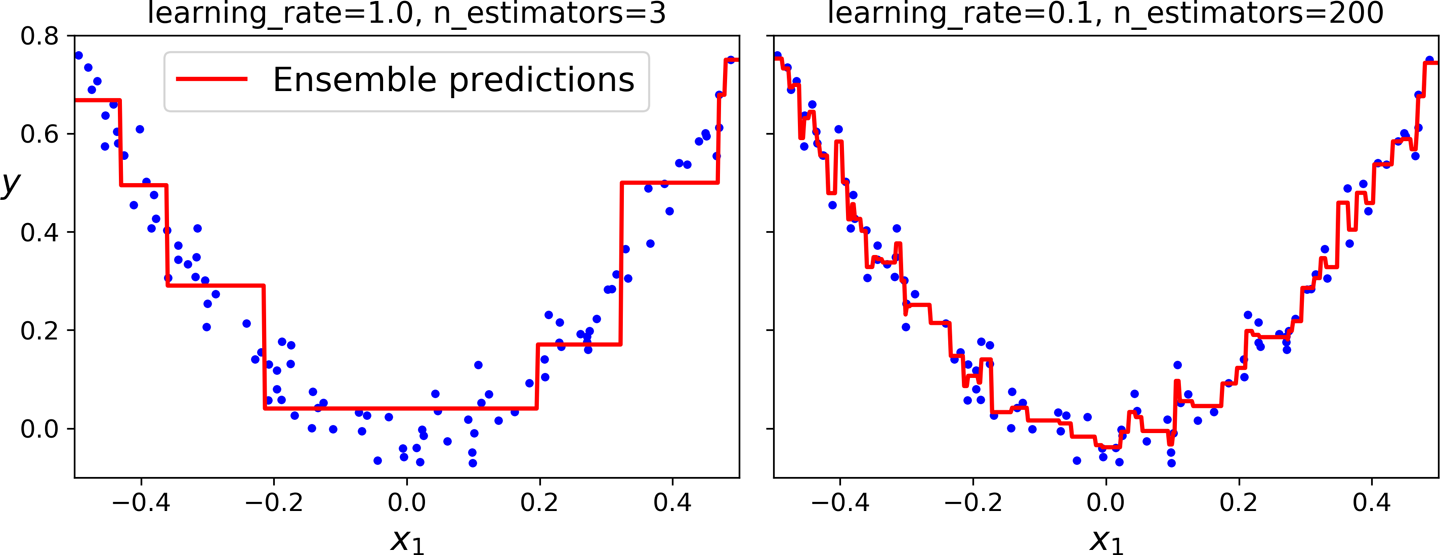

## Gradient Boosting with Early stopping
In order to find the optimal number of trees, you can use early stopping.

In [4]:
# Train a GradientBoostingRegressor with early stopping:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, 
                                      n_iter_no_change=10, random_state=42)
gbrt_best.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, n_iter_no_change=10,
                          random_state=42)

In [5]:
# Display the number of trees with early stopping:
gbrt_best.n_estimators_

57

## Histogram_Based Gradient Boosting
This estimator is much faster than GradientBoostingRegressor for big datasets (>= 10000 samples).
Early stopping is automatically activated if the training set contains mode than 10000 samples.

In [6]:
# Train a Histogram-Based GradientBoostingRegressor with early stopping.
from sklearn.ensemble import HistGradientBoostingRegressor

gbrt_hist = HistGradientBoostingRegressor(max_depth=2, max_iter=200, learning_rate=0.1, early_stopping=True,
                                      n_iter_no_change=10, random_state=42)
gbrt_hist.fit(X, y)

HistGradientBoostingRegressor(early_stopping=True, max_depth=2, max_iter=200,
                              random_state=42)

In [7]:
# Display the number of trees with early stopping:
gbrt_hist.n_iter_

65